In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import UpSampling2D,Input,BatchNormalization,Conv2D,Activation,Dropout,LeakyReLU,Flatten,Dense,Conv2DTranspose,Reshape

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
from random import randint
from keras.datasets import mnist

##Load data from mnist

In [2]:
(x_train,y_train),(x_test,y_test) =mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


#*Normalization*


In [4]:
x_train = x_train.astype('float32') /255 
x_test = x_test.astype('float32') / 255


                                                                    

## Input is defined based on the cifar deminsion

In [5]:
#input shape. cifar images are 32*32 and with RGB color as 3
input_shape=(28,28,1)
kernel_size=(3,3)
pool_size=(2,2)


#Encoder part

In [22]:

input= Input(shape=input_shape)
x = Conv2D(filters=32, kernel_size=(5, 5),  strides=(2,2) ,padding='same')(input)
x = LeakyReLU(0.2)(x)
x = Dropout(0.4)(x)

x = Conv2D(filters=64, kernel_size=(5, 5),  strides=(2,2), padding='same')(x)
x = LeakyReLU(0.2)(x)
x = Dropout(0.4)(x)

x = Conv2D(filters=128, kernel_size=(5, 5),  strides=(2,2), padding='same')(x)
x = LeakyReLU(0.2)(x)
x = Dropout(0.4)(x)

x = Conv2D(filters=256, kernel_size=(5, 5), strides=(2,2), padding='same')(x)
x = LeakyReLU(0.2)(x)
x = Dropout(0.4)(x)
x = Flatten()(x)
x = Dense(1,activation='sigmoid')(x)

discriminator = Model(input,x)

discriminator.summary()



Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 32)        832       
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 64)          51264     
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 7, 7, 64)         

In [29]:

dim=7
depth= 192
units_value= dim*dim*depth

x = Dense(units_value, input_dim=100)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Reshape((dim, dim, depth))(x)
x = Dropout(0.4)(x)
x = UpSampling2D((2, 2))(x)

x = Conv2DTranspose(filters=96, kernel_size=(5, 5),  strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2DTranspose(filters=48, kernel_size=(5, 5),  strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2DTranspose(filters=24, kernel_size=(5, 5),  strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Conv2DTranspose(filters=1, kernel_size=(5, 5),  strides=1, padding='same')(x)
x = Activation('sigmoid')(x)

generator = Model(input,x)

generator.summary()

ValueError: ignored

#Decoder Part

In [ ]:


x = Conv2D(128, (3, 3),  activation='relu',padding='same')(bottelneck)
x = UpSampling2D((2, 2))(x)

x = Conv2D(64, (3, 3),activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
#layer 
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)







#Model defination

In [ ]:
model = Model(input,decoded)
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.summary()

Model: "functional_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cifar10_input_32cross32 (Inp [(None, 32, 32, 3)]       0         
_________________________________________________________________
con2d_128 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
con2d_34 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
con2d_34.1 (Conv2D)          (None, 8, 8, 128)       

In [ ]:
model.fit(x_train,x_train,batch_size=512,epochs=50,shuffle=True,verbose=1,validation_split=0.30)

Epoch 1/50
69/69 [==============================] - 2s 26ms/step - loss: 0.0337 - accuracy: 0.5336 - val_loss: 0.0271 - val_accuracy: 0.6050
Epoch 2/50
69/69 [==============================] - 1s 22ms/step - loss: 0.0181 - accuracy: 0.6047 - val_loss: 0.0239 - val_accuracy: 0.6108
Epoch 3/50
69/69 [==============================] - 2s 22ms/step - loss: 0.0148 - accuracy: 0.6336 - val_loss: 0.0246 - val_accuracy: 0.6191
Epoch 4/50
69/69 [==============================] - 1s 21ms/step - loss: 0.0133 - accuracy: 0.6458 - val_loss: 0.0212 - val_accuracy: 0.6121
Epoch 5/50
69/69 [==============================] - 1s 22ms/step - loss: 0.0124 - accuracy: 0.6797 - val_loss: 0.0163 - val_accuracy: 0.6512
Epoch 6/50
69/69 [==============================] - 2s 22ms/step - loss: 0.0114 - accuracy: 0.7021 - val_loss: 0.0167 - val_accuracy: 0.6706
Epoch 7/50
69/69 [==============================] - 2s 22ms/step - loss: 0.0108 - accuracy: 0.7172 - val_loss: 0.0151 - val_accuracy: 0.7033
Epoch 8/50
69

In [ ]:

score = model.evaluate(x_test, x_test, verbose=1)
print(score)

313/313 [==============================] - 1s 3ms/step - loss: 0.0064 - accuracy: 0.7889
[0.006420954130589962, 0.7889134883880615]


In [ ]:
def compareImage(orig,  title,num=10):
   
    n = num
    plt.figure(figsize=(10, 5))
    print ('\033[1m' + title)
    for i in range(n):
        # display original
       
        ax = plt.subplot(2, n, i+1)
        plt.imshow(orig[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
       
    plt.show()


In [ ]:
rand

test Images


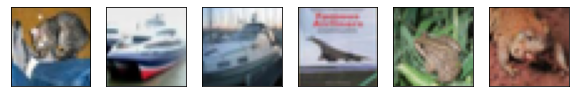

Predication


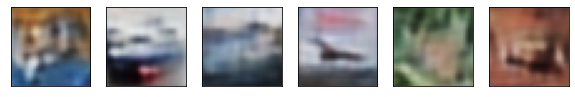

In [ ]:
prediction = model.predict(x_test)
compareImage(x_test, "test Images" ,6)
compareImage( prediction,"Predication" ,6)


#Another verification/Prediction check  using another dataset from CIFAR100

In [ ]:
from keras.datasets import cifar100

(x_train100, y_train100), (x_test100, y_test100) = cifar100.load_data()
x_train100 = x_train100.astype('float32')
x_test100 = x_test100.astype('float32')
x_train100 /= 255
x_test100 /= 255
score = model.evaluate(x_test100, x_test100, verbose=1)
print(score)

313/313 [==============================] - 1s 3ms/step - loss: 0.0068 - accuracy: 0.7944
[0.006841153837740421, 0.7944146394729614]


Original c100train


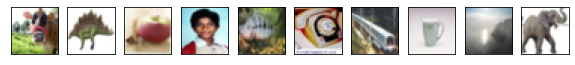

Predication c100train


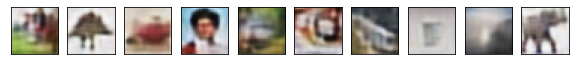

test x_test100


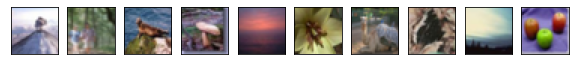

Predication c100test


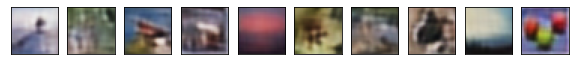

In [ ]:
c100train = model.predict(x_train100)
c100test = model.predict(x_test100)
compareImage(x_train100, "Original c100train" ,10)
compareImage( c100train,"Predication c100train" ,10)
compareImage(x_test100, "test x_test100" ,10)
compareImage( c100test,"Predication c100test" ,10)
